In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
from rayleigh_diagnostics import G_Avgs, build_file_list, Compile_GlobalAverages
%matplotlib inline

ek_dir = ['./ek1em1/','./ek1em2/','./ek1em3/']
E = [1e-1,1e-2,1e-3]

In [2]:
def rossby(ke,ekman):
    # rossby = numpy.sqrt(2*ke)/ekman
    rossby = numpy.sqrt(2*ke)*ekman
    return rossby

In [4]:
imax=20000000

for i in range(len(ek_dir)):
    print(ek_dir[i])
    ra = sorted(glob.glob(ek_dir[i] + 'ra*/'))
    for k in range(len(ra)):
        if './ek1em3/ra1e6_movie/' == ra[k]:
            pass
        elif './ek1em3/ra1e6_sphere/' == ra[k]:
            pass
        else:
            files = build_file_list(0,imax,ra[k] + 'G_Avgs')
            Compile_GlobalAverages(files,ra[k] + 'gcomp.dat')

./ek1em1/
./ek1em2/
./ek1em3/


In [7]:
import glob
f = sorted(glob.glob(ek_dir[0] + 'ra*/'))
print(f)

['./ek1em1/ra1e3/', './ek1em1/ra1e4/', './ek1em1/ra1e5/', './ek1em1/ra1e6/', './ek1em1/ra2e4/', './ek1em1/ra3e4/', './ek1em1/ra4e4/', './ek1em1/ra5e4/']


In [5]:
ek_one = []
ek_two = []
ek_three = []

for i in range(len(ek_dir)):
    print(ek_dir[i])
    ra = sorted(glob.glob(ek_dir[i] + 'ra*/'))
    for k in range(len(ra)):
        if './ek1em3/ra1e6_movie/' == ra[k]:
            pass
        elif './ek1em3/ra1e6_sphere/' == ra[k]:
            pass
        else:
            ga = G_Avgs('gcomp.dat',path=ra[k])
            ke = ga.lut[401]
            if i == 0:
                ek_one.append(ga.vals[-1,ke])
            elif i == 1:
                ek_two.append(ga.vals[-1,ke])
            else:
                ek_three.append(ga.vals[-1,ke])

./ek1em1/
./ek1em2/
./ek1em3/


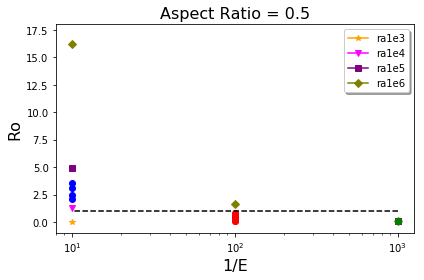

In [10]:
fig, ax = plt.subplots()
onetemp = numpy.ones(len(E))
Elin = numpy.linspace(1e-3,1e-1,3)

for i in range(len(ek_dir)):
    ra = sorted(glob.glob(ek_dir[i] + 'ra*/'))
    if i == 0:
        for k in range(len(ek_one)):
            rotemp = rossby(ek_one[k],E[0])
            if './ek1em1/ra1e3/' == ra[k]:
                ax.plot(1/E[0],rotemp,marker='*',color='orange',label='ra1e3')
            elif './ek1em1/ra1e4/' == ra[k]:
                ax.plot(1/E[0],rotemp,marker='v',color='magenta',label='ra1e4')
            elif './ek1em1/ra1e5/' == ra[k]:
                ax.plot(1/E[0],rotemp,marker='s',color='purple',label='ra1e5')
            elif './ek1em1/ra1e6/' == ra[k]:
                ax.plot(1/E[0],rotemp,marker='D',color='olive',label='ra1e6')
            else:
                ax.plot(1/E[0],rotemp,marker='o',color='blue')
    if i == 1:
        for k in range(len(ek_two)):
            rotemp = rossby(ek_two[k],E[1])
            if './ek1em2/ra1e3/' == ra[k]:
                ax.plot(1/E[1],rotemp,marker='*',color='orange')
            elif './ek1em2/ra1e4/' == ra[k]:
                ax.plot(1/E[1],rotemp,marker='v',color='magenta')
            elif './ek1em2/ra1e5/' == ra[k]:
                ax.plot(1/E[1],rotemp,marker='s',color='purple')
            elif './ek1em2/ra1e6/' == ra[k]:
                ax.plot(1/E[1],rotemp,marker='D',color='olive')
            else:
                ax.plot(1/E[1],rotemp,marker='o',color='red')
    if i == 2:
        for k in range(len(ek_three)):
            rotemp = rossby(ek_three[k],E[2])
            if './ek1em3/ra1e3/' == ra[k]:
                ax.plot(1/E[2],rotemp,marker='*',color='orange')
            elif './ek1em3/ra1e4/' == ra[k]:
                ax.plot(1/E[2],rotemp,marker='v',color='magenta')
            elif './ek1em3/ra1e5/' == ra[k]:
                ax.plot(1/E[2],rotemp,marker='s',color='purple')
            elif './ek1em3/ra1e6/' == ra[k]:
                ax.plot(1/E[2],rotemp,marker='D',color='olive')
            else:
                ax.plot(1/E[2],rotemp,marker='o',color='green')
                
ax.plot(1/Elin,onetemp,'--',color='black')
ax.legend(loc='best',shadow=True)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Ro',fontsize=16)
ax.set_xlabel('1/E',fontsize=16)
ax.set_title('Aspect Ratio = 0.5',fontsize=16)
ax.set_ylim(-1,18)
plt.tight_layout()
plt.show()